In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kibe\Downloads\customer-segmentation-dataset\customer-segmentation-dataset\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


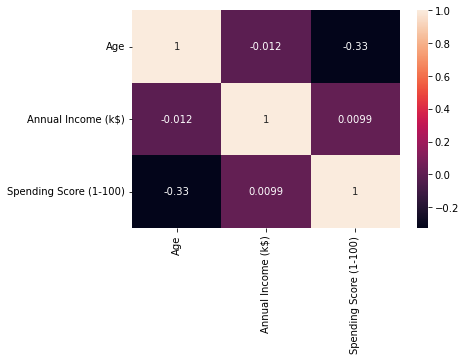

In [9]:
#correlation
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler.fit(df[features_to_scale ])
scaled_df = pd.DataFrame(scaler.transform(df[features_to_scale ]),columns=features_to_scale)
scaled_df

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


# Clustering using K-Means

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)
df["cluster"] = kmeans.labels_

V:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


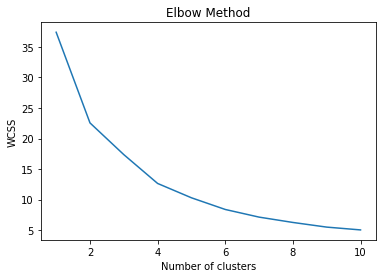

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Evaluating performance using silhouette score

In [22]:
# a silhouette score closer to 1 indicates a better clustering
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]


for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_df)
    
    df["cluster"] = kmeans.labels_
   
    silhouette_avg = silhouette_score(scaled_df, df["cluster"])
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3652498066402899
For n_clusters = 3 The average silhouette_score is : 0.36504262943838
For n_clusters = 4 The average silhouette_score is : 0.392319202055722
For n_clusters = 5 The average silhouette_score is : 0.40611743307078185
For n_clusters = 6 The average silhouette_score is : 0.4234860620777653
For n_clusters = 7 The average silhouette_score is : 0.42493242141407167
For n_clusters = 8 The average silhouette_score is : 0.41833277874254465


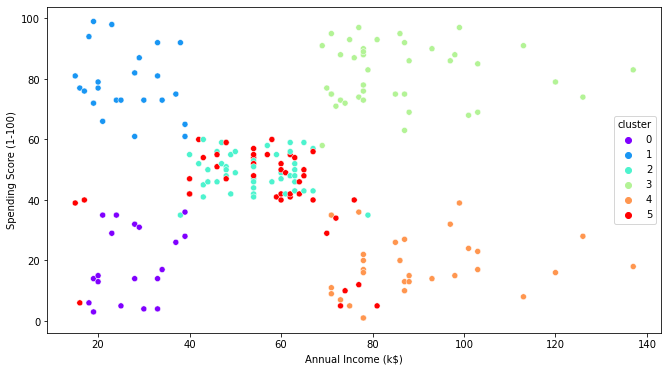

In [42]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
df["cluster"] = kmeans.labels_
figure = plt.figure(figsize=(11,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='rainbow', data=df)
plt.show()

Cluster4 represents customers with high annual income and low spending score<br>
Cluster2 and cluster 5 represent customers with average spending score and average annual income<br>
Cluster 0 represents customers with low spending score and low income<br>
Cluster 1 represents customers with low annual income and high spending score<br>
Cluster 3 represents customers with high spending score and high income<br>